# C.elegans

Comparison with deep learning RNA velocity framework (DeepVelo: https://github.com/bowang-lab/DeepVelo, UniTVelo: https://github.com/StatBiomed/UniTVelo and VeloVAE: https://github.com/welch-lab/VeloVAE)

In [76]:
import anndata
import numpy as np
import scvelo as scv
import scanpy as sc
import torch
import os.path
import pandas as pd
from Bio import Phylo
import matplotlib.pyplot as plt

In [20]:
import matplotlib.pyplot as plt

In [3]:
adata = scv.read("/data/liangzhen/wangk_Celegans/RNA_velocity_paper_force_cell/all.loom",cache=True)

adata_cells = adata.obs.index.to_list()
adata_cells = [cell.split(':')[1].replace("x","-b01") if 'Murray_b01' in cell else cell for cell in adata_cells ]
adata_cells = [cell.split(':')[1].replace("x","-b02") if 'Murray_b02' in cell else cell for cell in adata_cells ]
adata_cells = [cell.split(':')[1].replace("x","-r17") if 'Murray_r17' in cell else cell for cell in adata_cells ]
adata_cells = [cell.split(':')[1].replace("x","-300.1.1") if 'Waterston_300_min_10X_lane_1' in cell else cell for cell in adata_cells ]
adata_cells = [cell.split(':')[1].replace("x","-300.1.2") if 'Waterston_300_min_10X_lane_2' in cell else cell for cell in adata_cells ]
adata_cells = [cell.split(':')[1].replace("x","-300.1.3") if 'Waterston_300_min_10X_lane_3' in cell else cell for cell in adata_cells ]
adata_cells = [cell.split(':')[1].replace("x","-400.2.1") if 'Waterston_400_min_10X_lane_1' in cell else cell for cell in adata_cells ]
adata_cells = [cell.split(':')[1].replace("x","-400.2.2") if 'Waterston_400_min_10X_lane_2' in cell else cell for cell in adata_cells ]
adata_cells = [cell.split(':')[1].replace("x","-400.2.3") if 'Waterston_400_min_10X_lane_3' in cell else cell for cell in adata_cells ]
adata_cells = [cell.split(':')[1].replace("x","-500.1.1") if 'Waterston_500_min_batch_1_10X_lane_1' in cell else cell for cell in adata_cells ]
adata_cells = [cell.split(':')[1].replace("x","-500.1.2") if 'Waterston_500_min_batch_1_10X_lane_2' in cell else cell for cell in adata_cells ]
adata_cells = [cell.split(':')[1].replace("x","-500.1.3") if 'Waterston_500_min_batch_1_10X_lane_3' in cell else cell for cell in adata_cells ]
adata_cells = [cell.split(':')[1].replace("x","-500.2.1") if 'Waterston_500_min_batch_2_10X_lane_1' in cell else cell for cell in adata_cells ]
adata_cells = [cell.split(':')[1].replace("x","-500.2.2") if 'Waterston_500_min_batch_2_10X_lane_2' in cell else cell for cell in adata_cells ]


wk_data = pd.read_csv("/data/liangzhen/wangk_Celegans/c_eles_sample.csv",sep=',',header=0,index_col=0)
wk_cells = wk_data.index.to_list()

select_cell = adata.obs.index[[adata_cells.index(cell) for cell in wk_cells if cell in adata_cells]].to_list()

adata_select = adata[select_cell,]
scv.pp.filter_and_normalize(adata_select,min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata_select,n_pcs=30, n_neighbors=30)  #calculate the first and second order moments
# scv.tl.tsne(adata_select)
# scv.tl.umap(adata_select)

import pyreadr
globalumap = pyreadr.read_r('/data/liangzhen/wangk_Celegans/globalumap2d_Qin.rds')
globalumap = globalumap[None]
wk_umap = globalumap.loc[wk_data.index]
adata_select.obsm['X_umap'] = wk_umap.to_numpy()

GT_data = pd.read_csv("/data/liangzhen/wangk_Celegans/RNA_velocity_paper_force_cell/cell_anno_generation_time.csv",sep=',',header=0,index_col=0)
adata_select.obs["embryo_time"] = [float(time) for time in GT_data.loc[wk_data.index]["embryo.time"].to_list()]
adata_select.obs["generation_time"] = [float(time) for time in GT_data.loc[wk_data.index]["generation_time"].to_list()]

Trying to set attribute `.obs` of view, copying.


Filtered out 19955 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.
computing neighbors


2022-10-30 09:59:45.214098: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-30 09:59:47.263686: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-30 09:59:48.354903: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/torque/lib
2022-10-30 09:59:48.354931: I tensorflow/stream_executor/cuda/cudart_stub.

    finished (0:00:13) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


## scVelo - dynamical

recovering dynamics (using 1/64 cores)


  0%|          | 0/162 [00:00<?, ?gene/s]

    finished (0:00:12) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/64 cores)


  0%|          | 0/300 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


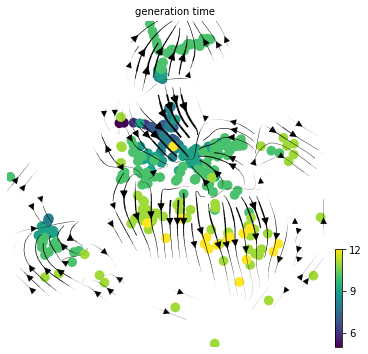

In [77]:
adata_scv = adata_select.copy()

scv.tl.recover_dynamics(adata_scv)
scv.tl.velocity(adata_scv,mode="dynamical")
scv.tl.velocity_graph(adata_scv)
scv.tl.velocity_pseudotime(adata_scv)
scv.pl.velocity_embedding_stream(adata_scv, basis='X_umap',color="generation_time",figsize=[6,6],s=380,alpha=1,density=1.5,arrow_size=1.5,legend_loc='None',
                               smooth=1)

In [78]:
scv.tl.latent_time(adata_scv)

computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


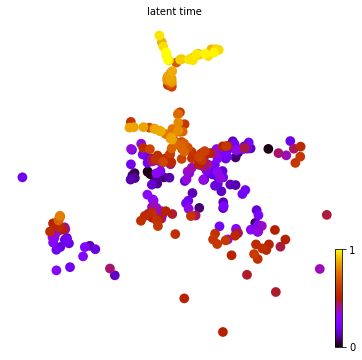

In [79]:
scv.pl.scatter(adata_scv, color='latent_time', color_map='gnuplot',figsize=[6,6],s=380,alpha=1,legend_loc='None')

## deepvelo

In [84]:
from deepvelo.utils import velocity, velocity_confidence, update_dict
from deepvelo.utils.preprocess import autoset_coeff_s
from deepvelo.utils.plot import statplot, compare_plot
from deepvelo import train, Constants
from deepvelo.utils.temporal import latent_time

In [85]:
adata_dv = adata_select.copy()

In [86]:
# specific configs to overide the default configs
configs = {
    "name": "DeepVelo", # name of the experiment
    "loss": {"args": {"coeff_s": autoset_coeff_s(adata_dv)}},
    "trainer": {"verbosity": 0}, # increase verbosity to show training progress
}
configs = update_dict(Constants.default_configs, configs)
configs['n_gpu']=0

The ratio of spliced reads is 95.3% (more than 85%). Suggest using coeff_s 1.0.


In [87]:
velocity(adata_dv, mask_zero=False)
trainer = train(adata_dv, configs)

computing velocities


INFO:train:Beginning training of DeepVelo ...


    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
building graph
velo data shape: torch.Size([300, 267])
velo_mat shape: (300, 267)
--> added 'velocity' (adata.layers)
--> added 'velocity_unspliced' (adata.layers)
--> added 'cell_specific_beta' (adata.layers)
--> added 'cell_specific_gamma' (adata.layers)


In [88]:
scv.tl.velocity_graph(adata_dv, n_jobs=8)

computing velocity graph (using 8/64 cores)


  0%|          | 0/300 [00:00<?, ?cells/s]

    finished (0:00:12) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


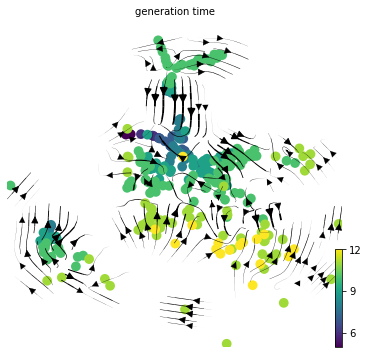

In [89]:
scv.pl.velocity_embedding_stream(adata_dv, basis='X_umap',color="generation_time",figsize=[6,6],s=380,alpha=1,density=1.5,arrow_size=1.5,legend_loc='None',
                               smooth=1)

In [90]:
latent_time(adata_dv)

computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


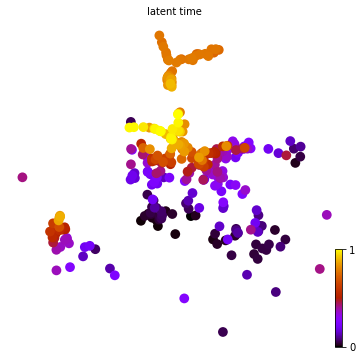

In [91]:
scv.pl.scatter(adata_dv, color='latent_time', color_map='gnuplot',figsize=[6,6],s=380,alpha=1,legend_loc='None')

## UnitVelo

In [92]:
import unitvelo as utv

(Running UniTVelo 0.2.4.3)
2022-10-30 08:29:12


In [93]:
adata_utv = adata_select.copy()

In [94]:
velo_config = utv.config.Configuration()
velo_config.R2_ADJUST = True
velo_config.IROOT = None
velo_config.FIT_OPTION = '1'
velo_config.AGENES_R2 = 1

-------> Manully Specified Parameter <-------
None


-------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None


Current working dir is /home/wangkun
Results will be stored in res folder


2022-10-30 16:29:13.042901: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/torque/lib
2022-10-30 16:29:13.042936: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-30 16:29:13.042959: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (node2): /proc/driver/nvidia/version does not exist
2022-10-30 16:29:13.043552: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


---> # of velocity genes used 85
---> # of velocity genes used 84
---> # of velocity genes used 84


22,269: 100%|████████████████████████████▉| 11997/12000 [04:05<00:00, 40.49it/s]

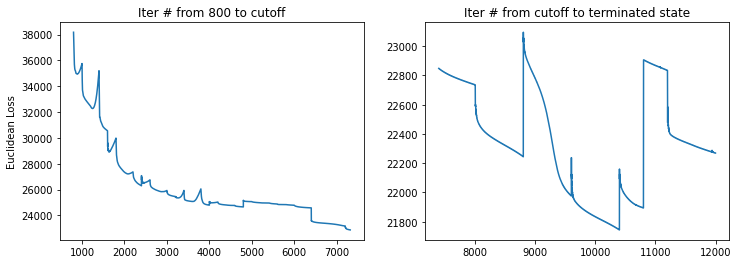

22,269: 100%|████████████████████████████▉| 11999/12000 [04:06<00:00, 48.68it/s]

Total loss 21744, vgene loss 22269


  0%|          | 0/300 [00:00<?, ?cells/s]

In [95]:
adata = utv.run_model(adata_utv, 'generation_time', config_file=velo_config)

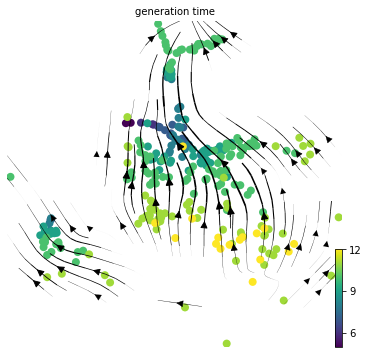

In [96]:
scv.pl.velocity_embedding_stream(adata_utv, color='generation_time', basis='X_umap',figsize=[6,6],s=255,alpha=1,density=1,arrow_size=1.5,smooth=1)

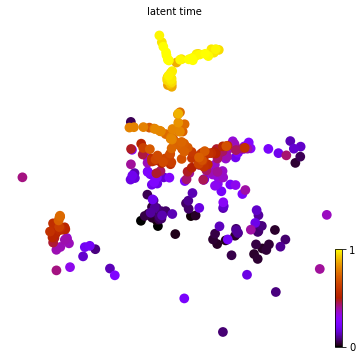

In [97]:
scv.tl.latent_time(adata_utv,min_likelihood=None)
scv.pl.scatter(adata_utv, color='latent_time', color_map='gnuplot',figsize=[6,6],s=380,alpha=1,legend_loc='None')

## VeloVAE

In [4]:
import sys
sys.path.append('/home/wangkun/VeloVAE-master/')
import velovae as vv

In [65]:
adata_vv = adata_select.copy()

In [67]:
scv.tl.recover_dynamics(adata_vv)
scv.tl.velocity(adata_vv,mode="dynamical")
scv.tl.velocity_graph(adata_vv)
scv.tl.velocity_pseudotime(adata_vv)
scv.tl.latent_time(adata_vv)

recovering dynamics (using 1/64 cores)


  0%|          | 0/145 [00:00<?, ?gene/s]

    finished (0:00:11) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/64 cores)


  0%|          | 0/300 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


In [68]:
torch.manual_seed(2022)
np.random.seed(2022)
full_vb = vv.VAEFullVB(adata_vv, tmax=20, dim_z=5)

Initialization using the steady-state and dynamical models.
Gaussian Prior.


In [69]:
full_vb.train(adata_vv, plot=True, config={'batch_size':32, 'n_neighbors':5}, figure_path='/home/wangkun/fullvb/celegans', embed="umap")

--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 7, test iteration: 12
Epoch 1: Train ELBO = -79137.258, Test ELBO = -326873.281, 	 Total Time =   0 h :  0 m :  0 s
Epoch 100: Train ELBO = -1681.788, Test ELBO = -1931.602, 	 Total Time =   0 h :  0 m : 11 s
Epoch 200: Train ELBO = -766.894, Test ELBO = -1054.477, 	 Total Time =   0 h :  0 m : 21 s
Epoch 300: Train ELBO = -588.448, Test ELBO = -766.455, 	 Total Time =   0 h :  0 m : 32 s
Epoch 400: Train ELBO = -416.151, Test ELBO = -536.519, 	 Total Ti

In [70]:
full_vb.save_anndata(adata_vv, 'fullvb',file_path='/home/wangkun/VeloVAE-master/', file_name="celegans_out.h5ad")

computing velocity graph (using 1/64 cores)


  0%|          | 0/300 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'fullvb_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'fullvb_velocity_umap', embedded velocity vectors (adata.obsm)


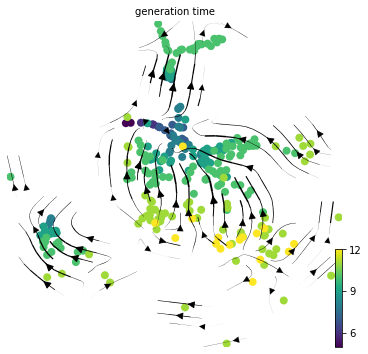

In [71]:
key = 'fullvb'
scv.tl.velocity_graph(adata_vv, vkey=f'{key}_velocity')
scv.tl.velocity_embedding(adata_vv, vkey=f'{key}_velocity')
scv.pl.velocity_embedding_stream(adata_vv, vkey=f'{key}_velocity', color='generation_time', basis='X_umap',figsize=[6,6],s=255,alpha=1,density=1,arrow_size=1.5,smooth=1)

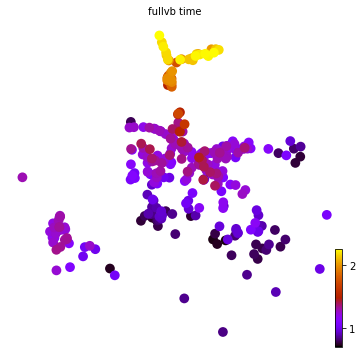

In [72]:
scv.pl.scatter(adata_vv, color='fullvb_time', color_map='gnuplot',figsize=[6,6],s=380,alpha=1,legend_loc='None')

In [74]:
import phylovelo as pv
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def norm_time(x):
    x -= min(x)
    return x/max(x)

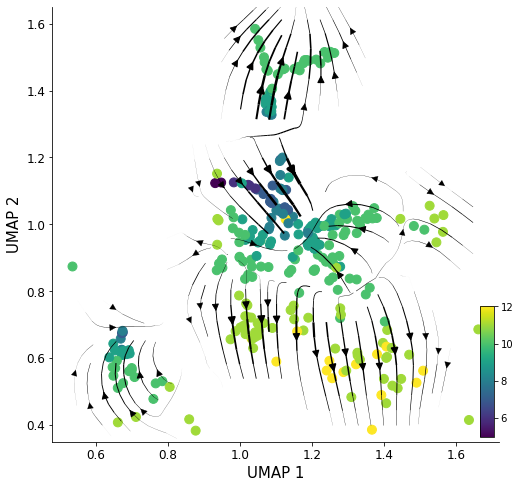

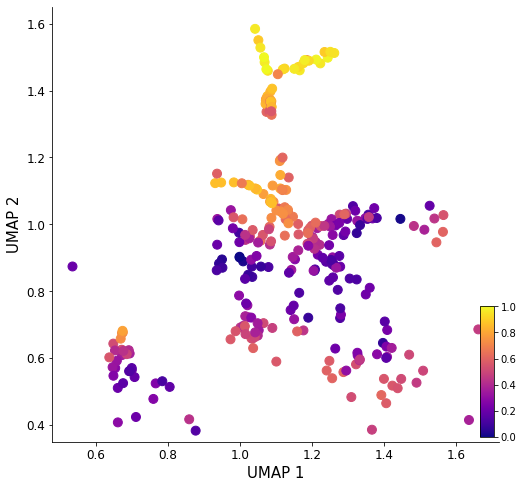

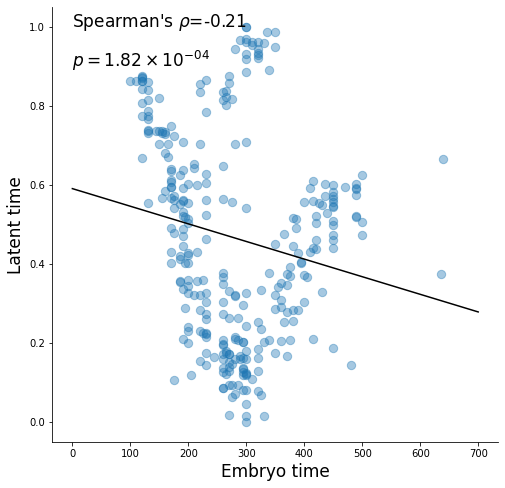

In [80]:
name = 'celegans_scvelo'
fig, ax = plt.subplots()
scatter = ax.scatter(adata.obsm['X_umap'][:, 0], adata.obsm['X_umap'][:, 1], c=adata.obs['generation_time'], s=80)
ax = pv.ana_utils.velocity_plot(adata.obsm['X_umap'], adata_scv.obsm['velocity_umap'], ax, 'stream',streamdensity=1.2, grid_density=25, radius=0.12, lw_coef=1500, arrowsize=1.5)
ax.figure.set_size_inches(8,8)
ax.set_xlabel('UMAP 1', fontsize=15)
ax.set_ylabel('UMAP 2', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0.35,1.65)
plt.savefig('/home/wangkun/modelcomp_figs/'+name+'.png', format='png')

fig, ax = plt.subplots()
scatter = ax.scatter(adata.obsm['X_umap'][:, 0], adata.obsm['X_umap'][:, 1], c=adata_scv.obs['latent_time'], cmap='plasma', s=80)
ax.figure.set_size_inches(8,8)
ax.set_xlabel('UMAP 1', fontsize=15)
ax.set_ylabel('UMAP 2', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0.35,1.65)

plt.savefig('/home/wangkun/modelcomp_figs/'+name+'_lt.png', format='png')


from scipy.stats import spearmanr
x = adata.obs['embryo_time']
y = adata_scv.obs['latent_time']

a, b = np.polyfit(x, y, deg=1)
y_est = a * np.linspace(0,700,100) + b

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, alpha=0.4, s=70)
ax.plot(np.linspace(0,700,100), y_est, '-', c='k')
ax.set_xlabel('Embryo time', fontsize=17)
ax.set_ylabel('Latent time', fontsize=17)
rho, pval = spearmanr(x, y)
ax.text(0, 1, r"Spearman's $\rho$={:.2g}".format(rho), fontsize=17)
ax.text(0, 0.9, r'$p={}\times 10^{}$'.format(*r'{:.2e}'.format(pval).split('e')).replace('^', '^{').replace('$', '}$')[1:], fontsize=17)
# ax.text(0, 0.9, r'$p={:.2e}$'.format(pval), fontsize=17)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('/home/wangkun/modelcomp_figs/'+name+'_cmp.png', format='png')

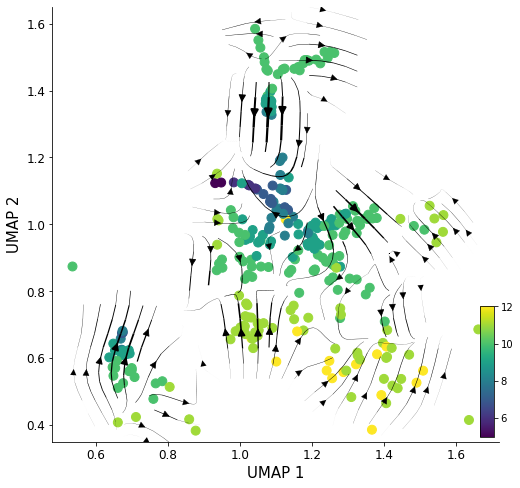

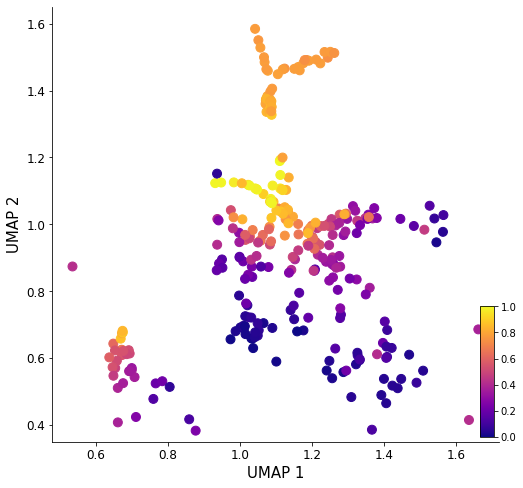

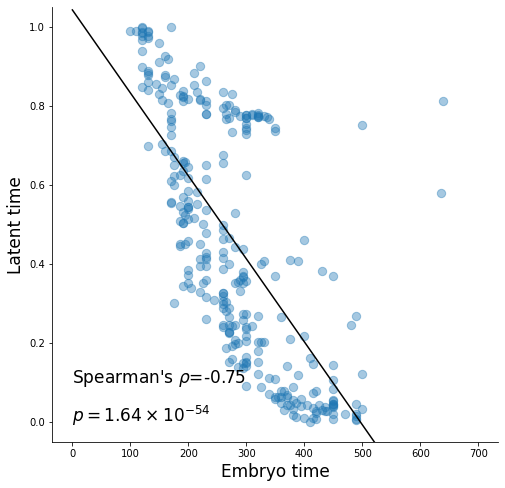

In [98]:
name = 'celegans_deepvelo'
fig, ax = plt.subplots()
scatter = ax.scatter(adata.obsm['X_umap'][:, 0], adata.obsm['X_umap'][:, 1], c=adata.obs['generation_time'], s=80)
ax = pv.ana_utils.velocity_plot(adata.obsm['X_umap'], adata_dv.obsm['velocity_umap'], ax, 'stream',streamdensity=1.2, grid_density=25, radius=0.12, lw_coef=1500, arrowsize=1.5)
ax.figure.set_size_inches(8,8)
ax.set_xlabel('UMAP 1', fontsize=15)
ax.set_ylabel('UMAP 2', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0.35,1.65)
plt.savefig('/home/wangkun/modelcomp_figs/'+name+'.png', format='png')

fig, ax = plt.subplots()
scatter = ax.scatter(adata.obsm['X_umap'][:, 0], adata.obsm['X_umap'][:, 1], c=adata_dv.obs['latent_time'], cmap='plasma', s=80)
ax.figure.set_size_inches(8,8)
ax.set_xlabel('UMAP 1', fontsize=15)
ax.set_ylabel('UMAP 2', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0.35,1.65)

plt.savefig('/home/wangkun/modelcomp_figs/'+name+'_lt.png', format='png')

from scipy.stats import spearmanr
x = adata.obs['embryo_time']
y = adata_dv.obs['latent_time']

a, b = np.polyfit(x, y, deg=1)
y_est = a * np.linspace(0,700,100) + b

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, alpha=0.4, s=70)
ax.plot(np.linspace(0,700,100), y_est, '-', c='k')
ax.set_xlabel('Embryo time', fontsize=17)
ax.set_ylabel('Latent time', fontsize=17)
rho, pval = spearmanr(x, y)
ax.text(0, 0.1, r"Spearman's $\rho$={:.2g}".format(rho), fontsize=17)
ax.text(0, 0.0, r'$p={}\times 10^{}$'.format(*r'{:.2e}'.format(pval).split('e')).replace('^', '^{').replace('$', '}$')[1:], fontsize=17)
# ax.text(0, 0.9, r'$p={:.2e}$'.format(pval), fontsize=17)
ax.set_ylim(-0.05, 1.05)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('/home/wangkun/modelcomp_figs/'+name+'_cmp.png', format='png')

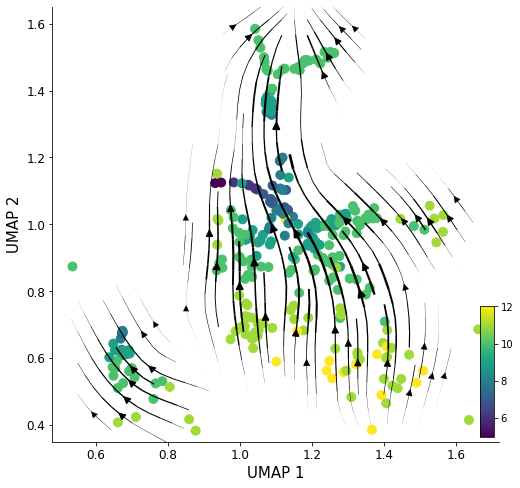

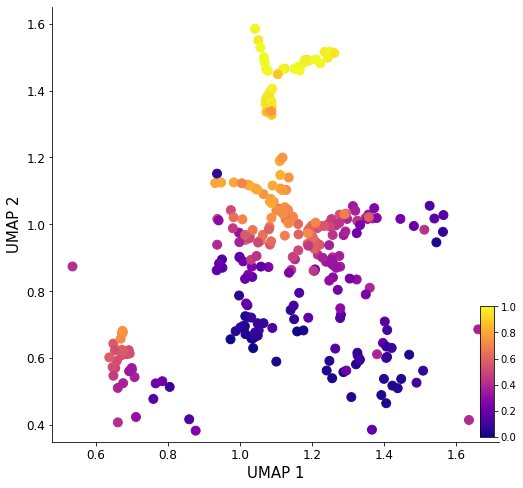

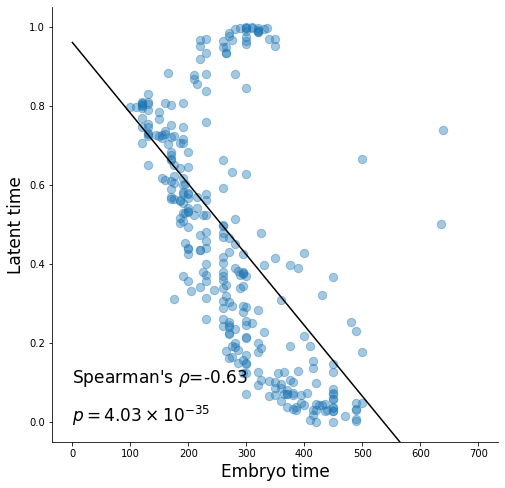

In [99]:
name = 'celegans_unitvelo'
fig, ax = plt.subplots()
scatter = ax.scatter(adata.obsm['X_umap'][:, 0], adata.obsm['X_umap'][:, 1], c=adata.obs['generation_time'], s=80)
ax = pv.ana_utils.velocity_plot(adata.obsm['X_umap'], adata_utv.obsm['velocity_umap'], ax, 'stream',streamdensity=1.2, grid_density=25, radius=0.12, lw_coef=1500, arrowsize=1.5)
ax.figure.set_size_inches(8,8)
ax.set_xlabel('UMAP 1', fontsize=15)
ax.set_ylabel('UMAP 2', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0.35,1.65)
plt.savefig('/home/wangkun/modelcomp_figs/'+name+'.png', format='png')

fig, ax = plt.subplots()
scatter = ax.scatter(adata.obsm['X_umap'][:, 0], adata.obsm['X_umap'][:, 1], c=adata_utv.obs['latent_time'], cmap='plasma', s=80)
ax.figure.set_size_inches(8,8)
ax.set_xlabel('UMAP 1', fontsize=15)
ax.set_ylabel('UMAP 2', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0.35,1.65)

plt.savefig('/home/wangkun/modelcomp_figs/'+name+'_lt.png', format='png')


from scipy.stats import spearmanr
x = adata.obs['embryo_time']
y = adata_utv.obs['latent_time']

a, b = np.polyfit(x, y, deg=1)
y_est = a * np.linspace(0,700,100) + b

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, alpha=0.4, s=70)
ax.plot(np.linspace(0,700,100), y_est, '-', c='k')
ax.set_xlabel('Embryo time', fontsize=17)
ax.set_ylabel('Latent time', fontsize=17)
rho, pval = spearmanr(x, y)
ax.text(0, 0.1, r"Spearman's $\rho$={:.2g}".format(rho), fontsize=17)
ax.text(0, 0.0, r'$p={}\times 10^{}$'.format(*r'{:.2e}'.format(pval).split('e')).replace('^', '^{').replace('$', '}$')[1:], fontsize=17)
# ax.text(0, 0.9, r'$p={:.2e}$'.format(pval), fontsize=17)
ax.set_ylim(-0.05, 1.05)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('/home/wangkun/modelcomp_figs/'+name+'_cmp.png', format='png')

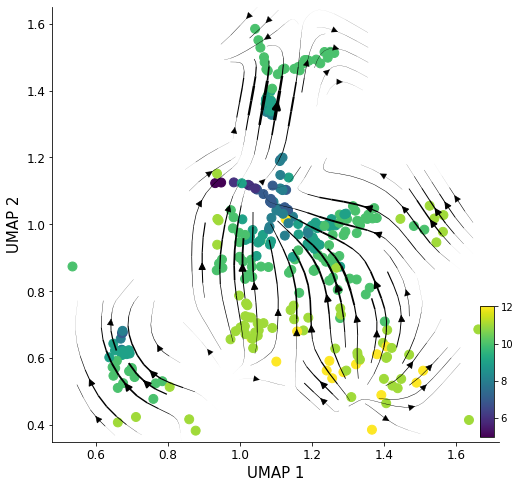

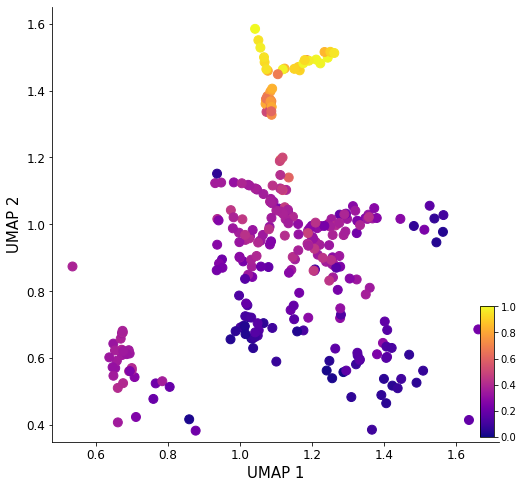

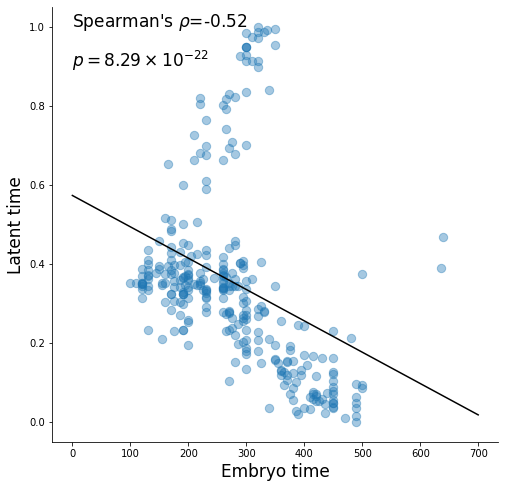

In [83]:
name = 'celegans_velovae'
fig, ax = plt.subplots()
scatter = ax.scatter(adata.obsm['X_umap'][:, 0], adata.obsm['X_umap'][:, 1], c=adata.obs['generation_time'], s=80)
ax = pv.ana_utils.velocity_plot(adata.obsm['X_umap'], adata_vv.obsm['fullvb_velocity_umap'], ax, 'stream',streamdensity=1.2, grid_density=25, radius=0.12, lw_coef=1500, arrowsize=1.5)
ax.figure.set_size_inches(8,8)
ax.set_xlabel('UMAP 1', fontsize=15)
ax.set_ylabel('UMAP 2', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0.35,1.65)
plt.savefig('/home/wangkun/modelcomp_figs/'+name+'.png', format='png')

fig, ax = plt.subplots()
scatter = ax.scatter(adata.obsm['X_umap'][:, 0], adata_vv.obsm['X_umap'][:, 1], c=norm_time(adata_vv.obs['fullvb_time']), cmap='plasma', s=80)
ax.figure.set_size_inches(8,8)
ax.set_xlabel('UMAP 1', fontsize=15)
ax.set_ylabel('UMAP 2', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0.35,1.65)

plt.savefig('/home/wangkun/modelcomp_figs/'+name+'_lt.png', format='png')


from scipy.stats import spearmanr
x = adata.obs['embryo_time']
y = norm_time(adata_vv.obs['fullvb_time'])

a, b = np.polyfit(x, y, deg=1)
y_est = a * np.linspace(0,700,100) + b

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, alpha=0.4, s=70)
ax.plot(np.linspace(0,700,100), y_est, '-', c='k')
ax.set_xlabel('Embryo time', fontsize=17)
ax.set_ylabel('Latent time', fontsize=17)
rho, pval = spearmanr(x, y)
ax.text(0, 1, r"Spearman's $\rho$={:.2g}".format(rho), fontsize=17)
ax.text(0, 0.9, r'$p={}\times 10^{}$'.format(*r'{:.2e}'.format(pval).split('e')).replace('^', '^{').replace('$', '}$')[1:], fontsize=17)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('/home/wangkun/modelcomp_figs/'+name+'_cmp.png', format='png')